# 2024-1 DSL 정규세션 과제
## Regression

- 작성자 : 9기 이승원
- 참고자료 : 해당 실습 자료는 23-2 응용통계학과 김현중 교수님의 [데이터마이닝]의 수업자료와 해당 수업에서 본 출제자가 진행한 프로젝트를 기반으로 만들었습니다.
- 과제 제출 기한 : 02.03

---
- 이름 : 송예원  
- 기수 : 11기   

#Setting

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('bicycle_data.xlsx') #경로변환필요
df.head()

행정동     이용건수       행정동코드  자치구  대여소개수       이용거리(M)    이용시간(분)  LCD_거치_대수  \
0  청운효자동  11755.0  11110515.0  종로구    3.0  2.904426e+07   284027.0        5.0   
1    사직동  58976.0  11110530.0  종로구   12.0  1.243033e+08  1195279.0       99.0   
2    삼청동  15960.0  11110540.0  종로구    5.0  3.520926e+07   368791.0       23.0   
3    부암동   4353.0  11110550.0  종로구    5.0  1.896218e+07   126968.0       23.0   
4    평창동   3810.0  11110560.0  종로구    5.0  1.410898e+07    94067.0       15.0   

   QR_거치_대수  상권_수  ...     여자20s생활인구     여자30s생활인구     여자40s생활인구  \
0      59.0   5.0  ...  2.885425e+06  3.143521e+06  3.745018e+06   
1     139.0   6.0  ...  5.133218e+06  6.282004e+06  5.561868e+06   
2      38.0   1.0  ...  1.157874e+06  1.197700e+06  1.266266e+06   
3      26.0   5.0  ...  2.305686e+06  1.908983e+06  2.804853e+06   
4      23.0   3.0  ...  1.935554e+06  2.306512e+06  3.250538e+06   

      여자50s생활인구     여자60s생활인구   여자70s이상생활인구  아파트_단지_수    아파트_평균_시가  길단위유동인구  \
0  3.170072e+06  2.157854e+06  2.640629e+06     323.0  276146690.0  14261.0   
1  4.041477e+06  2.650009e+06  2.740232e+06      89.0  371237211.0  34035.0   
2  9.427540e+05  7.849797e+05  7.954017e+05       9.0  401044841.0   6745.0   
3  2.466070e+06  1.871393e+06  2.216136e+06     189.0  259634651.0   5001.0   
4  3.803050e+06  3.117086e+06  3.559939e+06     294.0  480839259.0    878.0   

    직장인구  
0   41.0  
1  413.0  
2   40.0  
3   18.0  
4   26.0  

[5 rows x 76 columns]

#Linear Regression

## 전처리

분석에 필요하지 않은 열 제거
독립변수의 임의 제거가 아니라, 애초에 분석에 불필요한 정보를 제거한다

In [3]:
df1 = df.drop(['행정동', '행정동코드', '자치구', '대여소개수',  '이용거리(M)', '이용시간(분)',
       'LCD_거치_대수', 'QR_거치_대수'], axis=1)

drop후 열들을 확인해본다

In [4]:
df1.columns

Index(['이용건수', '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수',
       '약국_수', '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수',
       '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '0s_foreigner', '10s_foreigner',
       '20s_foreigner', '30s_foreigner', '40s_foreigner', '50s_foreigner',
       '60s_foreigner', '70s_foreigner', '80s_foreigner', '90s_foreigner',
       '100s_foreigner', '0s_korean', '10s_korean', '20s_korean', '30s_korean',
       '40s_korean', '50s_korean', '60s_korean', '70s_korean', '80s_korean',
       '90s_korean', '100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '아파트_단지_수', '아파트_평균_시가',
       '길단위유동인구', '직장인구'],
      dtype='object')

데이터를 살펴보면 알 수 있듯이, 각 변수들의 데이터 값들의 범위는 상당히 다르다.

회귀분석은 데이터의 단위(범위)에 민감하기 때문에 스케일링을 해줘야 한다.

In [5]:
df1

이용건수  상권_수  집객시설_수  관공서_수  은행_수  총병원_수  종합병원_수  일반_병원_수  약국_수  유치원_수  \
0    11755.0   5.0    24.0    3.0   1.0    0.0     0.0      0.0   1.0    0.0   
1    58976.0   6.0   200.0   12.0  22.0    0.0     0.0      0.0  20.0    0.0   
2    15960.0   1.0    16.0    3.0   1.0    0.0     0.0      0.0   0.0    0.0   
3     4353.0   5.0    46.0    3.0   2.0    0.0     0.0      0.0   2.0    0.0   
4     3810.0   3.0    86.0    4.0   1.0    0.0     0.0      0.0   2.0    1.0   
..       ...   ...     ...    ...   ...    ...     ...      ...   ...    ...   
419  65958.0   5.0   119.0    4.0   5.0    0.0     0.0      0.0  13.0    1.0   
420  67324.0   8.0   228.0    6.0   9.0    5.0     1.0      4.0  35.0    4.0   
421   6046.0   0.0     0.0    0.0   0.0    0.0     0.0      0.0   0.0    0.0   
422  31293.0   5.0    56.0    4.0   2.0    0.0     0.0      0.0   5.0    2.0   
423  56797.0   1.0    27.0    4.0   1.0    0.0     0.0      0.0   4.0    0.0   

     ...     여자20s생활인구     여자30s생활인구     여자40s생활인구     여자50s생활인구  \
0    ...  2.885425e+06  3.143521e+06  3.745018e+06  3.170072e+06   
1    ...  5.133218e+06  6.282004e+06  5.561868e+06  4.041477e+06   
2    ...  1.157874e+06  1.197700e+06  1.266266e+06  9.427540e+05   
3    ...  2.305686e+06  1.908983e+06  2.804853e+06  2.466070e+06   
4    ...  1.935554e+06  2.306512e+06  3.250538e+06  3.803050e+06   
..   ...           ...           ...           ...           ...   
419  ...  4.100588e+06  4.508070e+06  5.078307e+06  4.802777e+06   
420  ...  8.100074e+06  9.606454e+06  1.003074e+07  1.050778e+07   
421  ...  4.623928e+05  5.626901e+05  8.728238e+05  7.819439e+05   
422  ...  3.285450e+06  4.040530e+06  4.538618e+06  4.752250e+06   
423  ...  5.202796e+06  8.939979e+06  1.012911e+07  7.231052e+06   

        여자60s생활인구   여자70s이상생활인구  아파트_단지_수    아파트_평균_시가   길단위유동인구   직장인구  
0    2.157854e+06  2.640629e+06     323.0  276146690.0   14261.0   41.0  
1    2.650009e+06  2.740232e+06      89.0  371237211.0   34035.0  413.0  
2    7.849797e+05  7.954017e+05       9.0  401044841.0    6745.0   40.0  
3    1.871393e+06  2.216136e+06     189.0  259634651.0    5001.0   18.0  
4    3.117086e+06  3.559939e+06     294.0  480839259.0     878.0   26.0  
..            ...           ...       ...          ...       ...    ...  
419  4.100662e+06  4.233233e+06     460.0  212466670.0  103677.0   72.0  
420  9.221236e+06  9.993622e+06     618.0  227597799.0  104558.0   58.0  
421  6.641561e+05  7.958338e+05       4.0  854201839.0      93.0   17.0  
422  4.024634e+06  4.670248e+06     316.0  261960069.0   45335.0   32.0  
423  6.456761e+06  7.187758e+06     180.0  564568969.0   12004.0    4.0  

[424 rows x 68 columns]


- Point 1: Robust Scaler를 사용한 이유는 해당 스케일링 기법이 중앙값과 사분위수 범위를 사용하므로 이상치에 덜 민감하기 때문이다. 따라서 따로 이상치 제거를 해주지 않았다. (다른 스케일링 방법을 사용한다면 이상치를 확인하고 제거해주는 것이 바람직하다)

- Point 2: 이것은 모르면 에러가 뜨는 부분이다. ols를 돌릴 때, 컬럼명이 숫자로 시작하면 오류가 뜬다. (출제자가 실제 회귀분석과제를 할 때 에러가 떠서 고생을 했던 기억이 있어 꼭 기억하면 좋겠다.)

In [6]:
from sklearn.preprocessing import RobustScaler
# 변형 객체 생성
robust_scaler = RobustScaler()

# 훈련데이터의 모수 분포 저장
robust_scaler.fit(df1)

# 훈련 데이터 스케일링
all_scaled = robust_scaler.transform(df1)
df2_scaled = pd.DataFrame(all_scaled, columns = df1.columns)

# 회귀 분석에 맞게 컬럼명 변경 (원래 숫자로 되어 있던 컬럼명에 언더바를 추가해줌)
df2_scaled.columns = ['이용건수', '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수',
       '약국_수', '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수',
       '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '_0s_foreigner', '_10s_foreigner',
       '_20s_foreigner', '_30s_foreigner', '_40s_foreigner', '_50s_foreigner',
       '_60s_foreigner', '_70s_foreigner', '_80s_foreigner', '_90s_foreigner',
       '_100s_foreigner', '_0s_korean', '_10s_korean', '_20s_korean', '_30s_korean',
       '_40s_korean', '_50s_korean', '_60s_korean', '_70s_korean', '_80s_korean',
       '_90s_korean', '_100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '아파트_단지_수', '아파트_평균_시가',
       '길단위유동인구', '직장인구']

In [7]:
df2_scaled

이용건수      상권_수    집객시설_수  관공서_수  은행_수  총병원_수  종합병원_수  일반_병원_수  \
0   -0.370264  0.333333 -0.422145    0.5  0.00    0.0     0.0      0.0   
1    1.192504  0.666667  2.013841    5.0  5.25    0.0     0.0      0.0   
2   -0.231101 -1.000000 -0.532872    0.5  0.00    0.0     0.0      0.0   
3   -0.615232  0.333333 -0.117647    0.5  0.25    0.0     0.0      0.0   
4   -0.633202 -0.333333  0.435986    1.0  0.00    0.0     0.0      0.0   
..        ...       ...       ...    ...   ...    ...     ...      ...   
419  1.423572  0.333333  0.892734    1.0  1.00    0.0     0.0      0.0   
420  1.468779  1.333333  2.401384    2.0  2.00    5.0     1.0      4.0   
421 -0.559202 -1.333333 -0.754325   -1.0 -0.25    0.0     0.0      0.0   
422  0.276341  0.333333  0.020761    1.0  0.25    0.0     0.0      0.0   
423  1.120391 -1.000000 -0.380623    1.0  0.00    0.0     0.0      0.0   

         약국_수  유치원_수  ...  여자20s생활인구  여자30s생활인구  여자40s생활인구  여자50s생활인구  \
0   -0.555556    0.0  ...  -0.186164  -0.188702   0.023044  -0.156918   
1    1.555556    0.0  ...   0.476562   0.844300   0.655541   0.240888   
2   -0.666667    0.0  ...  -0.695505  -0.829151  -0.839882  -1.173713   
3   -0.444444    0.0  ...  -0.357091  -0.595038  -0.304255  -0.478303   
4   -0.444444    1.0  ...  -0.466219  -0.464196  -0.149099   0.132043   
..        ...    ...  ...        ...        ...        ...        ...   
419  0.777778    1.0  ...   0.172107   0.260426   0.487200   0.588430   
420  3.222222    4.0  ...   1.351293   1.938511   2.211284   3.192828   
421 -0.666667    0.0  ...  -0.900557  -1.038158  -0.976850  -1.247125   
422 -0.111111    2.0  ...  -0.068223   0.106540   0.299318   0.565363   
423 -0.222222    0.0  ...   0.497076   1.719147   2.245529   1.696964   

     여자60s생활인구  여자70s이상생활인구  아파트_단지_수  아파트_평균_시가   길단위유동인구      직장인구  
0    -0.370213    -0.254954  0.444662   0.046755 -0.752024  0.000000  
1    -0.086386    -0.200455 -0.472086   0.450052 -0.385100  5.975904  
2    -1.161956    -1.264595 -0.785504   0.576471 -0.891490 -0.016064  
3    -0.535416    -0.487221 -0.080313  -0.023275 -0.923851 -0.369478  
4     0.182979     0.248059  0.331048   0.914894 -1.000357 -0.240964  
..         ...          ...       ...        ...       ...       ...  
419   0.750212     0.616461  0.981391  -0.223324  0.907170  0.497992  
420   3.703267     3.768333  1.600392  -0.159150  0.923517  0.273092  
421  -1.231635    -1.264358 -0.805093   2.498394 -1.014924 -0.385542  
422   0.706366     0.855579  0.417238  -0.013413 -0.175418 -0.144578  
423   2.108984     2.233068 -0.115573   1.270007 -0.793904 -0.594378  

[424 rows x 68 columns]

## 변수 선택

독립변수와 종속변수에 해당하는 변수들을 각각 할당한다.

In [8]:
X = df2_scaled.drop('이용건수', axis=1)
y = df2_scaled['이용건수']

파이썬 자체적으로 제공해주는 feature selection 모듈이 없다. 따라서 코드를 짜거나, 누가 짜놓은 코드를 가져와서 쓰면 된다.

번거로우니 feature_selection.py 파일을 불러와서 사용해보자. py파일을 열어보면 몇 개의 변수 선택 메소드가 주어져 있다.

- point 1: 선형회귀분석이니 'linear' 입력
- point 2: aic 값을 기준으로 선택할 것이기 때문에 'aic' 입력

모듈로 불러와서 사용해보자

1. 현재 위치 파악을 파악한다

In [9]:
pwd

'/Users/yewonsong/Desktop/DSL/과제/회귀_SVM_비지도 통합과제/Regression'

2. 본인 환경에 맞는 디렉토리 설정 (py 파일이 있는 곳으로 옮겨야 함)
- Jupyter Notebook에서 할 때는 이 과정 불필요, 바로 import하면 됨

In [ ]:
cd /content/gdrive/MyDrive/0116_regression

3. 잘 옮겨졌는지 확인

In [ ]:
pwd

In [10]:
import sys
sys.path.append('feature_selection.py') # 각자 환경에 맞게 위치 경로 설정해주세요!

In [11]:
import feature_selection as fsel

fsel.forwardSelection(X, y, model_type='linear', elimination_criteria='aic')

Character Variables (Dummies Generated, First Dummies Dropped): []
Entered : 남자40s생활인구 	AIC : 1280.964912822545
Entered : _30s_korean 	AIC : 1270.9460933043408
Entered : 아파트_단지_수 	AIC : 1244.1841297555256
Entered : 길단위유동인구 	AIC : 1239.2670646825086
Entered : 초등학교_수 	AIC : 1234.8726886034897
Entered : 직장인구 	AIC : 1230.9220038536073
Entered : 지하철_하차 	AIC : 1228.155526320979
Break : Significance Level
                            OLS Regression Results                            
Dep. Variable:                   이용건수   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     37.31
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           1.75e-40
Time:                        15:29:42   Log-Likelihood:                -606.08
No. Observations:                 424   AIC:                             1228.
Df Residuals:                     416   BIC: 

['intercept',
 '남자40s생활인구',
 '_30s_korean',
 '아파트_단지_수',
 '길단위유동인구',
 '초등학교_수',
 '직장인구',
 '지하철_하차']

feature selection을 하면 몇 개의 변수가 선택된다.
해당 변수들이 다중공선성을 만족하는지 확인 후, 다중공선성을 만족한다는 변수들의 조합으로 선형회귀 분석을 진행한다.

* 다중공선성 판별 기준: VIF값 10 이하


**선택된 변수들로 선형회귀분석을 진행해봅시다**
- point 1: feature selection을 통해 선택된 변수들 중,
- point 2: 다중공선성 문제가 없어야 만족해야 함.

In [12]:
# feature selection을 통해 선택된 변수들을 리스트 형태로 입력하세요!

selected_cols =  ['남자40s생활인구',
 '_30s_korean',
 '아파트_단지_수',
 '길단위유동인구',
 '초등학교_수',
 '직장인구',
 '지하철_하차']

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 데이터프레임 초기화
vif_data = df2_scaled[selected_cols].copy()  # X를 복사하여 사용합니다.

# VIF 계산
vif_data['Intercept'] = 1  # 상수항을 위한 Intercept 추가
vif_series = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index=vif_data.columns)

vif_df = pd.DataFrame(vif_series)
vif_df = vif_df.reset_index()
vif_df.columns = ['col', 'vif']
vif_df

# VIF 출력
#print(vif_series)

# VIF 10 이상 삭제
selected_cols = []
for i in range(len(vif_df)):
    if vif_df['vif'][i] < 10:
        selected_cols.append(vif_df['col'][i])

selected_cols.remove('Intercept')
selected_cols

['남자40s생활인구', '_30s_korean', '아파트_단지_수', '길단위유동인구', '초등학교_수', '직장인구', '지하철_하차']

In [14]:
import statsmodels.formula.api as smf

In [15]:
model = smf.ols(formula = "이용건수~ " + "+".join(selected_cols).replace(" ", "_"),
                 data=df2_scaled)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   이용건수   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     37.31
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           1.75e-40
Time:                        15:29:47   Log-Likelihood:                -606.08
No. Observations:                 424   AIC:                             1228.
Df Residuals:                     416   BIC:                             1261.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1797      0.057      3.148      0.002       0.067       0.292
남자40s생활인구       0.4433      0.071      6.228      0.000       0.303       0.583
_30s_korean     0.4910      0.090      5.451      0.000       0.314       0.668
아파트_단지_수       -0.3688      0.072     -5.098      0.000      -0.511      -0.227
길단위유동인구        -0.1829      0.067     -2.712      0.007      -0.316      -0.050
초등학교_수          0.7257      0.273      2.662      0.008       0.190       1.262
직장인구           -0.0668      0.024     -2.775      0.006      -0.114      -0.019
지하철_하차          0.1150      0.053      2.169      0.031       0.011       0.219
==============================================================================
Omnibus:                      386.066   Durbin-Watson:                   1.532
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20893.959
Skew:                           3.582   Prob(JB):                         0.00
Kurtosis:                      36.636   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Evaluation

In [16]:
#sklearn 패키지의 model_selection 모듈에서 train_test_split 함수를 사용

from sklearn.model_selection import train_test_split
train, test = train_test_split(df2_scaled, test_size=0.3, random_state=1)
print('train:', len(train), '| test:', len(test))

X_train = train.drop(['이용건수'], axis=1)
y_train = train['이용건수']
X_test = test.drop(['이용건수'], axis=1)
y_test = test['이용건수']

from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
pred = result.predict(X_test)

train: 296 | test: 128


In [17]:
print(f'r2: {r2(y_test, pred)}')
print(f'mse: {mse(y_test, pred)}')
print(f'mae: {mae(y_test, pred)}')
print(f'mape: {mape(y_test, pred)}')

r2: 0.4645130532216032
mse: 1.5950294642500689
mae: 0.689016731517567
mape: 2.2034124083054962


## 회귀진단
: 다중공선성 앞에서 이미 제거하고 시작했으니 double-check할 필요는 없다.

In [18]:
import statsmodels.api as sm

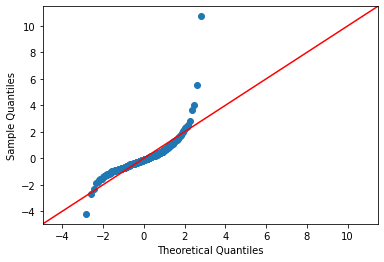

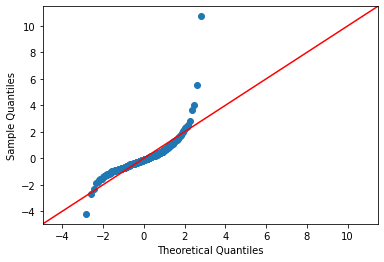

In [32]:
import seaborn as sns
import matplotlib as plt

sm.qqplot(result.resid, fit=True, line='45')

<AxesSubplot:xlabel='fitted', ylabel='resid'>

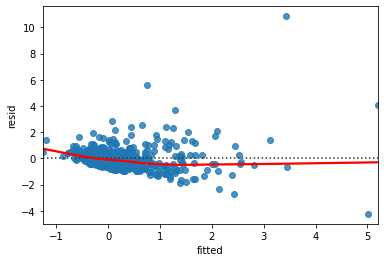

In [33]:
eqvar = pd.DataFrame({'fitted': result.fittedvalues, 'resid' : result.resid })
sns.residplot(x='fitted', y='resid', data=eqvar, line_kws={'color':'red'}, lowess=True)

[To-Do]
1. Robust 이외의 다른 방식으로 스케일링을 해보는 방식으로 전처리를 해본다.
2. 전진선택, 후진선택 두 가지 방법을 사용하여 변수선택을 해본다.
3. 다중공선성을 제거한다

⟹ 이 과정을 통해 다양한 변수들의 조합이 나올 수 있다
example;
- model1 : min-max scaling + forward selection + 다중공선성 제거
- model2 : min-max scaling + backward selection + 다중공선성 제거
4. R squared 값이 가장 높은 변수 조합의 모델을 선택하여 최종 모형으로 삼는다.
5. evaluation과 회귀진단을 시행한다.


### 1) 전처리

In [144]:
# 불필요한 열 제거
df = pd.read_excel('bicycle_data.xlsx') 
df1 = df.drop(['행정동', '행정동코드', '자치구', '대여소개수',  '이용거리(M)', '이용시간(분)',
       'LCD_거치_대수', 'QR_거치_대수'], axis=1)
df1

이용건수  상권_수  집객시설_수  관공서_수  은행_수  총병원_수  종합병원_수  일반_병원_수  약국_수  유치원_수  \
0    11755.0   5.0    24.0    3.0   1.0    0.0     0.0      0.0   1.0    0.0   
1    58976.0   6.0   200.0   12.0  22.0    0.0     0.0      0.0  20.0    0.0   
2    15960.0   1.0    16.0    3.0   1.0    0.0     0.0      0.0   0.0    0.0   
3     4353.0   5.0    46.0    3.0   2.0    0.0     0.0      0.0   2.0    0.0   
4     3810.0   3.0    86.0    4.0   1.0    0.0     0.0      0.0   2.0    1.0   
..       ...   ...     ...    ...   ...    ...     ...      ...   ...    ...   
419  65958.0   5.0   119.0    4.0   5.0    0.0     0.0      0.0  13.0    1.0   
420  67324.0   8.0   228.0    6.0   9.0    5.0     1.0      4.0  35.0    4.0   
421   6046.0   0.0     0.0    0.0   0.0    0.0     0.0      0.0   0.0    0.0   
422  31293.0   5.0    56.0    4.0   2.0    0.0     0.0      0.0   5.0    2.0   
423  56797.0   1.0    27.0    4.0   1.0    0.0     0.0      0.0   4.0    0.0   

     ...     여자20s생활인구     여자30s생활인구     여자40s생활인구     여자50s생활인구  \
0    ...  2.885425e+06  3.143521e+06  3.745018e+06  3.170072e+06   
1    ...  5.133218e+06  6.282004e+06  5.561868e+06  4.041477e+06   
2    ...  1.157874e+06  1.197700e+06  1.266266e+06  9.427540e+05   
3    ...  2.305686e+06  1.908983e+06  2.804853e+06  2.466070e+06   
4    ...  1.935554e+06  2.306512e+06  3.250538e+06  3.803050e+06   
..   ...           ...           ...           ...           ...   
419  ...  4.100588e+06  4.508070e+06  5.078307e+06  4.802777e+06   
420  ...  8.100074e+06  9.606454e+06  1.003074e+07  1.050778e+07   
421  ...  4.623928e+05  5.626901e+05  8.728238e+05  7.819439e+05   
422  ...  3.285450e+06  4.040530e+06  4.538618e+06  4.752250e+06   
423  ...  5.202796e+06  8.939979e+06  1.012911e+07  7.231052e+06   

        여자60s생활인구   여자70s이상생활인구  아파트_단지_수    아파트_평균_시가   길단위유동인구   직장인구  
0    2.157854e+06  2.640629e+06     323.0  276146690.0   14261.0   41.0  
1    2.650009e+06  2.740232e+06      89.0  371237211.0   34035.0  413.0  
2    7.849797e+05  7.954017e+05       9.0  401044841.0    6745.0   40.0  
3    1.871393e+06  2.216136e+06     189.0  259634651.0    5001.0   18.0  
4    3.117086e+06  3.559939e+06     294.0  480839259.0     878.0   26.0  
..            ...           ...       ...          ...       ...    ...  
419  4.100662e+06  4.233233e+06     460.0  212466670.0  103677.0   72.0  
420  9.221236e+06  9.993622e+06     618.0  227597799.0  104558.0   58.0  
421  6.641561e+05  7.958338e+05       4.0  854201839.0      93.0   17.0  
422  4.024634e+06  4.670248e+06     316.0  261960069.0   45335.0   32.0  
423  6.456761e+06  7.187758e+06     180.0  564568969.0   12004.0    4.0  

[424 rows x 68 columns]

In [145]:
#Robust Scaler이 아닌 다른 스케일링 방법을 사용하므로 이상치 확인하고 제거
#이상치 확인
print(f'Original data shape: {df1.shape}')

#Calculate IQR
q1 = np.percentile(df1,25,axis=0)
q3 = np.percentile(df1,75,axis=0)
iqr = q3-q1

outlier_mask = np.any((df1 < (q1 - 1.5 * iqr)) | (df1 > (q3 + 1.5 * iqr)), axis=1)
df_no_outliers = df1[~outlier_mask]
print(f'Outlier removed data shape: {df_no_outliers.shape}')

df_no_outliers.reset_index(drop=True,inplace=True)
df_no_outliers

Original data shape: (424, 68)
Outlier removed data shape: (77, 68)


이용건수  상권_수  집객시설_수  관공서_수  은행_수  총병원_수  종합병원_수  일반_병원_수  약국_수  유치원_수  \
0   11755.0   5.0    24.0    3.0   1.0    0.0     0.0      0.0   1.0    0.0   
1    8751.0   1.0    12.0    0.0   0.0    0.0     0.0      0.0   0.0    0.0   
2   13881.0   1.0    13.0    3.0   0.0    0.0     0.0      0.0   1.0    0.0   
3    4047.0   1.0    16.0    0.0   0.0    0.0     0.0      0.0   2.0    0.0   
4    4198.0   1.0    10.0    1.0   0.0    0.0     0.0      0.0   1.0    0.0   
..      ...   ...     ...    ...   ...    ...     ...      ...   ...    ...   
72  29354.0   2.0    74.0    1.0   5.0    0.0     0.0      0.0  18.0    2.0   
73  19033.0   3.0    32.0    1.0   0.0    0.0     0.0      0.0   6.0    1.0   
74   8290.0   3.0    61.0    1.0   4.0    0.0     0.0      0.0   9.0    0.0   
75  14151.0   0.0     0.0    0.0   0.0    0.0     0.0      0.0   0.0    0.0   
76  31293.0   5.0    56.0    4.0   2.0    0.0     0.0      0.0   5.0    2.0   

    ...     여자20s생활인구     여자30s생활인구     여자40s생활인구     여자50s생활인구     여자60s생활인구  \
0   ...  2.885425e+06  3.143521e+06  3.745018e+06  3.170072e+06  2.157854e+06   
1   ...  6.648263e+05  8.024612e+05  8.136821e+05  9.173839e+05  7.242546e+05   
2   ...  1.342178e+06  1.265461e+06  1.207323e+06  1.511428e+06  1.169529e+06   
3   ...  1.571513e+06  1.995145e+06  1.784381e+06  2.040471e+06  1.566359e+06   
4   ...  1.144467e+06  1.685473e+06  1.447891e+06  1.403924e+06  1.270991e+06   
..  ...           ...           ...           ...           ...           ...   
72  ...  1.649030e+06  1.782726e+06  3.254084e+06  2.676917e+06  2.290916e+06   
73  ...  1.908560e+06  3.673859e+06  4.419398e+06  3.259123e+06  2.666845e+06   
74  ...  1.867685e+06  3.086096e+06  2.720648e+06  2.615845e+06  2.113840e+06   
75  ...  1.381136e+06  2.117743e+06  3.009534e+06  2.333664e+06  1.893216e+06   
76  ...  3.285450e+06  4.040530e+06  4.538618e+06  4.752250e+06  4.024634e+06   

     여자70s이상생활인구  아파트_단지_수    아파트_평균_시가  길단위유동인구  직장인구  
0   2.640629e+06     323.0  276146690.0  14261.0  41.0  
1   7.324072e+05      26.0  320701236.0  53894.0  14.0  
2   1.230454e+06      44.0  271960677.0  89026.0  19.0  
3   1.957543e+06      59.0  562530704.0  99785.0  46.0  
4   1.475853e+06      80.0  541443092.0  13872.0  24.0  
..           ...       ...          ...      ...   ...  
72  2.466550e+06      81.0  606495793.0  24079.0  31.0  
73  2.873440e+06     115.0  566947021.0  10617.0   9.0  
74  2.119923e+06     114.0  308204454.0  11409.0  12.0  
75  1.845011e+06     119.0  508041003.0   8696.0  18.0  
76  4.670248e+06     316.0  261960069.0  45335.0  32.0  

[77 rows x 68 columns]

In [146]:
from sklearn.preprocessing import MinMaxScaler

#변형 객체 생성
minmax_scaler = MinMaxScaler()

#훈련데이터의 모수 분포 저장
minmax_scaler.fit(df_no_outliers) 

#훈련 데이터 스케일링
all_scaled = minmax_scaler.transform(df_no_outliers) 
df2_scaled = pd.DataFrame(all_scaled,columns=df1.columns)
df2_scaled.columns= ['이용건수', '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수',
       '약국_수', '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수',
       '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '_0s_foreigner', '_10s_foreigner',
       '_20s_foreigner', '_30s_foreigner', '_40s_foreigner', '_50s_foreigner',
       '_60s_foreigner', '_70s_foreigner', '_80s_foreigner', '_90s_foreigner',
       '_100s_foreigner', '_0s_korean', '_10s_korean', '_20s_korean', '_30s_korean',
       '_40s_korean', '_50s_korean', '_60s_korean', '_70s_korean', '_80s_korean',
       '_90s_korean', '_100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '아파트_단지_수', '아파트_평균_시가',
       '길단위유동인구', '직장인구']
df2_scaled

이용건수      상권_수    집객시설_수     관공서_수      은행_수  총병원_수  종합병원_수  일반_병원_수  \
0   0.162577  0.833333  0.224299  0.500000  0.166667    0.0     0.0      0.0   
1   0.121031  0.166667  0.112150  0.000000  0.000000    0.0     0.0      0.0   
2   0.191981  0.166667  0.121495  0.500000  0.000000    0.0     0.0      0.0   
3   0.055972  0.166667  0.149533  0.000000  0.000000    0.0     0.0      0.0   
4   0.058060  0.166667  0.093458  0.166667  0.000000    0.0     0.0      0.0   
..       ...       ...       ...       ...       ...    ...     ...      ...   
72  0.405980  0.333333  0.691589  0.166667  0.833333    0.0     0.0      0.0   
73  0.263236  0.500000  0.299065  0.166667  0.000000    0.0     0.0      0.0   
74  0.114655  0.500000  0.570093  0.166667  0.666667    0.0     0.0      0.0   
75  0.195715  0.000000  0.000000  0.000000  0.000000    0.0     0.0      0.0   
76  0.432798  0.833333  0.523364  0.666667  0.333333    0.0     0.0      0.0   

        약국_수  유치원_수  ...  여자20s생활인구  여자30s생활인구  여자40s생활인구  여자50s생활인구  \
0   0.055556    0.0  ...   0.370202   0.358036   0.435086   0.405195   
1   0.000000    0.0  ...   0.000000   0.000000   0.000000   0.000000   
2   0.055556    0.0  ...   0.112923   0.070810   0.058426   0.106852   
3   0.111111    0.0  ...   0.151156   0.182406   0.144077   0.202012   
4   0.055556    0.0  ...   0.079962   0.135046   0.094133   0.087515   
..       ...    ...  ...        ...        ...        ...        ...   
72  1.000000    1.0  ...   0.164079   0.149919   0.362219   0.316491   
73  0.333333    0.5  ...   0.207346   0.439145   0.535181   0.421213   
74  0.500000    0.0  ...   0.200532   0.349254   0.283043   0.305506   
75  0.000000    0.0  ...   0.119418   0.201156   0.325921   0.254749   
76  0.277778    1.0  ...   0.436892   0.495223   0.552876   0.689785   

    여자60s생활인구  여자70s이상생활인구  아파트_단지_수  아파트_평균_시가   길단위유동인구      직장인구  
0    0.314422     0.430370  0.497487   0.346823  0.038438  0.243056  
1    0.000000     0.000000  0.000000   0.434917  0.312190  0.055556  
2    0.097659     0.112327  0.030151   0.338546  0.554853  0.090278  
3    0.184693     0.276311  0.055276   0.913071  0.629168  0.277778  
4    0.119912     0.167673  0.090452   0.871376  0.035752  0.125000  
..        ...          ...       ...        ...       ...       ...  
72   0.343605     0.391110  0.092127   1.000000  0.106253  0.173611  
73   0.426055     0.482877  0.149079   0.921803  0.013269  0.020833  
74   0.304768     0.312933  0.147404   0.410208  0.018739  0.041667  
75   0.256380     0.250931  0.155779   0.805332  0.000000  0.083333  
76   0.723850     0.888120  0.485762   0.318772  0.253072  0.180556  

[77 rows x 68 columns]

### 2) 변수 선택

In [147]:
X = df2_scaled.drop('이용건수', axis=1)
y = df2_scaled['이용건수']

In [148]:
#전진선택 
fsel.forwardSelection(X, y, model_type='linear', 
                      elimination_criteria='aic')

Character Variables (Dummies Generated, First Dummies Dropped): []
Entered : 총생활인구수 	AIC : -40.002380808098394
Entered : 길단위유동인구 	AIC : -46.32150470041279
Entered : _20s_foreigner 	AIC : -49.068932380378385
Break : Significance Level
                            OLS Regression Results                            
Dep. Variable:                   이용건수   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     13.15
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           5.89e-07
Time:                        17:24:14   Log-Likelihood:                 28.534
No. Observations:                  77   AIC:                            -49.07
Df Residuals:                      73   BIC:                            -39.69
Df Model:                           3                                         
Covariance Type:            nonrobust                  

['intercept', '총생활인구수', '길단위유동인구', '_20s_foreigner']

In [149]:
selected_cols_forward = ['총생활인구수','길단위유동인구','_20s_foreigner']

In [94]:
#후진선택
fsel.backwardSelection(X, y, model_type='linear', 
                      elimination_criteria='aic')

Character Variables (Dummies Generated, First Dummies Dropped): []
Eliminated : 관공서_수
Eliminated : 아파트_단지_수
Eliminated : _40s_foreigner
Eliminated : 직장인구
Eliminated : _70s_foreigner
Eliminated : 상권_수
Eliminated : 지하철_승차
Eliminated : 대중교통_하차
Regained :  대중교통_하차
                            OLS Regression Results                            
Dep. Variable:                   이용건수   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     2.303
Date:                Wed, 31 Jan 2024   Prob (F-statistic):            0.00827
Time:                        16:50:52   Log-Likelihood:                 68.435
No. Observations:                  77   AIC:                            -44.87
Df Residuals:                      31   BIC:                             62.95
Df Model:                          45                                         
Covariance Type:            

['intercept',
 '집객시설_수',
 '은행_수',
 '총병원_수',
 '종합병원_수',
 '일반_병원_수',
 '약국_수',
 '유치원_수',
 '초중고등학교_수',
 '초등학교_수',
 '중학교_수',
 '고등학교_수',
 '대학교_수',
 '백화점_수',
 '슈퍼마켓_수',
 '극장_수',
 '숙박_시설_수',
 '_0s_foreigner',
 '_10s_foreigner',
 '_20s_foreigner',
 '_30s_foreigner',
 '_50s_foreigner',
 '_60s_foreigner',
 '_80s_foreigner',
 '_90s_foreigner',
 '_100s_foreigner',
 '_0s_korean',
 '_10s_korean',
 '_20s_korean',
 '_30s_korean',
 '_40s_korean',
 '_50s_korean',
 '_60s_korean',
 '_70s_korean',
 '_80s_korean',
 '_90s_korean',
 '_100s_korean',
 '총생활인구수',
 '대중교통_승차',
 '버스_승차',
 '대중교통_하차',
 '지하철_하차',
 '버스_하차',
 '남자0s생활인구',
 '남자10s생활인구',
 '남자20s생활인구',
 '남자30s생활인구',
 '남자40s생활인구',
 '남자50s생활인구',
 '남자60s생활인구',
 '남자70s이상생활인구',
 '여자0s생활인구',
 '여자10s생활인구',
 '여자20s생활인구',
 '여자30s생활인구',
 '여자40s생활인구',
 '여자50s생활인구',
 '여자60s생활인구',
 '여자70s이상생활인구',
 '아파트_평균_시가',
 '길단위유동인구']

In [95]:
selected_cols_backward = ['집객시설_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수', '약국_수', '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수', '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '_0s_foreigner', '_10s_foreigner', '_20s_foreigner', '_30s_foreigner', '_50s_foreigner', '_60s_foreigner', '_80s_foreigner', '_90s_foreigner', '_100s_foreigner', '_0s_korean', '_10s_korean', '_20s_korean', '_30s_korean', '_40s_korean', '_50s_korean', '_60s_korean', '_70s_korean', '_80s_korean', '_90s_korean', '_100s_korean', '총생활인구수', '대중교통_승차', '버스_승차', '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구', '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구', '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구', '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '아파트_평균_시가', '길단위유동인구']

### 3) 다중공선성 제거

In [150]:
#model 1 : min-max scaling + forward selection + 다중공선성 제거
vif_data = df2_scaled[selected_cols_forward].copy()

vif_data['Intercept']=1
vif_series = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)

vif_df = pd.DataFrame(vif_series)
vif_df = vif_df.reset_index()
vif_df.columns = ['col','vif']
vif_df

col       vif
0          총생활인구수  1.006882
1         길단위유동인구  1.138432
2  _20s_foreigner  1.141485
3       Intercept  7.925034

In [151]:
#VIF 10 이상 삭제
selected_cols_forward = []
for i in range(len(vif_df)):
    if vif_df['vif'][i]<10:
        selected_cols_forward.append(vif_df['col'][i])
selected_cols_forward.remove('Intercept')
selected_cols_forward

['총생활인구수', '길단위유동인구', '_20s_foreigner']

In [96]:
#model 2 : min-max scaling + backward selection + 다중공선성 제거
vif_data = df2_scaled[selected_cols_backward].copy()

vif_data['Intercept']=1
vif_series = pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)

vif_df = pd.DataFrame(vif_series)
vif_df = vif_df.reset_index()
vif_df.columns = ['col','vif']
vif_df

#VIF 10 이상 삭제
selected_cols_backward = []
for i in range(len(vif_df)):
    if vif_df['vif'][i]<10:
        selected_cols_backward.append(vif_df['col'][i])
selected_cols_backward.remove('Intercept')
selected_cols_backward

/Users/yewonsong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/yewonsong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/yewonsong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


['은행_수',
 '유치원_수',
 '_0s_foreigner',
 '_10s_foreigner',
 '_20s_foreigner',
 '_30s_foreigner',
 '_50s_foreigner',
 '_60s_foreigner',
 '_80s_foreigner',
 '_100s_korean',
 '아파트_평균_시가',
 '길단위유동인구']

In [152]:
model1 = smf.ols(formula = "이용건수~ " + "+".join(selected_cols_forward).replace(" ", "_"),
                 data=df2_scaled)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   이용건수   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     13.15
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           5.89e-07
Time:                        17:24:26   Log-Likelihood:                 28.534
No. Observations:                  77   AIC:                            -49.07
Df Residuals:                      73   BIC:                            -39.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0858      0.055      1.559      0.123      -0.024       0.195
총생활인구수             0.6052      0.118      5.114      0.000       0.369       0.841
길단위유동인구           -0.3301      0.093     -3.537      0.001      -0.516      -0.144
_20s_foreigner     0.2102      0.098      2.155      0.034       0.016       0.405
==============================================================================
Omnibus:                        8.136   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                9.080
Skew:                           0.521   Prob(JB):                       0.0107
Kurtosis:                       4.321   Cond. No.                         7.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
model2 = smf.ols(formula = "이용건수~ " + "+".join(selected_cols_backward).replace(" ", "_"),
                 data=df2_scaled)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   이용건수   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     2.368
Date:                Wed, 31 Jan 2024   Prob (F-statistic):             0.0136
Time:                        16:51:02   Log-Likelihood:                 26.042
No. Observations:                  77   AIC:                            -26.08
Df Residuals:                      64   BIC:                             4.385
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2307      0.078      2.943      0.005       0.074       0.387
은행_수               0.0023      0.100      0.023      0.982      -0.198       0.203
유치원_수              0.0346      0.092      0.376      0.708      -0.150       0.219
_0s_foreigner     -0.2605      0.144     -1.806      0.076      -0.549       0.028
_10s_foreigner    -0.1796      0.230     -0.782      0.437      -0.639       0.279
_20s_foreigner     0.0074      0.161      0.046      0.963      -0.313       0.328
_30s_foreigner     0.4502      0.176      2.556      0.013       0.098       0.802
_50s_foreigner     0.5013      0.302      1.657      0.102      -0.103       1.106
_60s_foreigner    -0.3060      0.312     -0.980      0.331      -0.930       0.318
_80s_foreigner    -0.2534      0.136     -1.863      0.067      -0.525       0.018
_100s_korean      -0.0343      0.111     -0.311      0.757      -0.255       0.187
아파트_평균_시가          0.1413      0.099      1.424      0.159      -0.057       0.340
길단위유동인구           -0.3532      0.116     -3.036      0.003      -0.586      -0.121
==============================================================================
Omnibus:                        6.895   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                6.289
Skew:                           0.673   Prob(JB):                       0.0431
Kurtosis:                       3.388   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model1의 R squared 값이 더 높기 때문에 최종 모형으로 선택!!
#### Model1: min-max scaling + forward selection + 다중공선성 제거

### 4) Evaluation

In [167]:
train, test = train_test_split(df2_scaled, test_size=0.4, random_state=1)
print('train:', len(train), '| test:', len(test))

X_train = train.drop(['이용건수'], axis=1)
y_train = train['이용건수']
X_test = test.drop(['이용건수'], axis=1)
y_test = test['이용건수']

pred = result1.predict(X_test)
print(f'r2: {r2(y_test, pred)}')
print(f'mse: {mse(y_test, pred)}')
print(f'mae: {mae(y_test, pred)}')
print(f'mape: {mape(y_test, pred)}')

train: 46 | test: 31
r2: 0.0407001605456202
mse: 0.02614541290321952
mae: 0.129640164755377
mape: 28923643048737.273


### 5) 회귀진단


In [168]:
sm.qqplot(result1.resid,fit=True,line='45')

- 45도 직선에 밀접한다 => 정규성을 따른다.

In [169]:
from scipy import stats
stats.shapiro(result1.resid)

ShapiroResult(statistic=0.9769245982170105, pvalue=0.17437534034252167)

- p-value=0.1744>0.05 이므로 유의수준 5%에서 잔차의 정규성이 위반되었다고 할 수 없다!

<AxesSubplot:xlabel='fitted', ylabel='resid'>

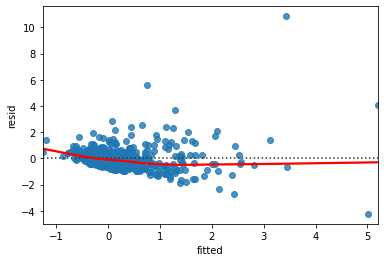

In [170]:
eqvar = pd.DataFrame({'fitted': result.fittedvalues, 'resid' : result.resid })
sns.residplot(x='fitted', y='resid', data=eqvar, line_kws={'color':'red'}, lowess=True)

- 잔차들이 일정하게 퍼져있지 않아 등분산성을 만족하지 못한다. 

#Logistic Regression

In [21]:
import pandas as pd
df = pd.read_excel('bicycle_data.xlsx')

## 전처리

0.5를 기준으로 레이블링을 해준다.

※사실 이것은 해당 프로젝트의 여러 시도 중 한 방법으로 굳이 추천하지는 않습니다.

※로지스틱 회귀분석의 전 과정을 이해하기 위해 임의적으로 레이블링을 한 것으로 가정하고, 분석의 과정에 더 집중해주시기를를 바랍니다.

In [22]:
# 중앙값 기준으로 0,1
y_median = df['이용건수'].quantile(0.5)
df['y'] = df['이용건수'].apply(lambda x: 1 if x >= y_median else 0)

# 열 순서 재배치
df = df[['행정동', '이용건수', 'y', '대여소개수', '이용거리(M)', '이용시간(분)', 'LCD_거치_대수', 'QR_거치_대수',
       '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수', '약국_수',
       '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수', '백화점_수',
       '슈퍼마켓_수', '극장_수', '숙박_시설_수', '0s_foreigner', '10s_foreigner',
       '20s_foreigner', '30s_foreigner', '40s_foreigner', '50s_foreigner',
       '60s_foreigner', '70s_foreigner', '80s_foreigner', '90s_foreigner',
       '100s_foreigner', '0s_korean', '10s_korean', '20s_korean', '30s_korean',
       '40s_korean', '50s_korean', '60s_korean', '70s_korean', '80s_korean',
       '90s_korean', '100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '길단위유동인구', '직장인구']]

# 이 과정이 필요한 이유: logistic model 돌릴 때 숫자로 시작하거나, (~) 같은게 포함되어 있으면 분석이 제대로 안됨
df.columns = ['행정동', '이용건수', 'y', '대여소개수', '이용거리', '이용시간', 'LCD_거치_대수', 'QR_거치_대수',
       '상권_수', '집객시설_수', '관공서_수', '은행_수', '총병원_수', '종합병원_수', '일반_병원_수', '약국_수',
       '유치원_수', '초중고등학교_수', '초등학교_수', '중학교_수', '고등학교_수', '대학교_수', '백화점_수',
       '슈퍼마켓_수', '극장_수', '숙박_시설_수', '_0s_foreigner', '_10s_foreigner',
       '_20s_foreigner', '_30s_foreigner', '_40s_foreigner', '_50s_foreigner',
       '_60s_foreigner', '_70s_foreigner', '_80s_foreigner', '_90s_foreigner',
       '_100s_foreigner', '_0s_korean', '_10s_korean', '_20s_korean', '_30s_korean',
       '_40s_korean', '_50s_korean', '_60s_korean', '_70s_korean', '_80s_korean',
       '_90s_korean', '_100s_korean', '총생활인구수', '대중교통_승차', '지하철_승차', '버스_승차',
       '대중교통_하차', '지하철_하차', '버스_하차', '남자0s생활인구', '남자10s생활인구', '남자20s생활인구',
       '남자30s생활인구', '남자40s생활인구', '남자50s생활인구', '남자60s생활인구', '남자70s이상생활인구',
       '여자0s생활인구', '여자10s생활인구', '여자20s생활인구', '여자30s생활인구', '여자40s생활인구',
       '여자50s생활인구', '여자60s생활인구', '여자70s이상생활인구', '길단위유동인구', '직장인구']


## Modeling

In [23]:
# X, y 나누기
X = df.drop(['행정동', '이용건수', 'y', '이용거리','이용시간','대여소개수'], axis=1)
y = df['y']

In [24]:
# 변수 선택을 위한 AIC 최적화 함수: 전진선택
def forward_selection_AIC(X, y):
    features = X.columns
    selected_features = []
    best_aic = float('inf')

    for feature in features:
        model = sm.Logit(y, sm.add_constant(df[selected_features + [feature]]))
        result = model.fit()
        current_aic = result.aic

        if current_aic < best_aic:
            best_aic = current_aic
            selected_features.append(feature)

    return selected_features, best_aic

# 목표 변수와 데이터 프레임을 지정하여 변수 선택 수행
response_variable = 'y'
selected_features, best_aic = forward_selection_AIC(X, y)

# 결과 출력
print("Selected Features:", selected_features)
print("Best AIC:", best_aic)

Optimization terminated successfully.
         Current function value: 0.502605
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.389764
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.389611
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.389731
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.381440
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.380133
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.380471
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.379984
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.379487
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.375832
  

/Users/yewonsong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.368798
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.369787
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.369206
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.368931
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.366991
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361223
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.360209
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361210
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361128
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361138
  

선택된 feature들을 가지고 model fitting

In [25]:
x_formula = '+'.join(selected_features)
x_formula = 'y~'+ x_formula
x_formula = x_formula.replace(" ", "")

model1 = smf.glm(formula = x_formula, data = df, family=sm.families.Binomial())
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  424
Model:                            GLM   Df Residuals:                      410
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -138.52
Date:                Wed, 31 Jan 2024   Deviance:                       277.04
Time:                        15:33:15   Pearson chi2:                     460.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5195
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.6182      0.577     -8.006      0.000      -5.749      -3.488
LCD_거치_대수          0.0622      0.010      6.407      0.000       0.043       0.081
QR_거치_대수           0.0649      0.008      7.816      0.000       0.049       0.081
관공서_수             -0.2034      0.083     -2.450      0.014      -0.366      -0.041
약국_수               0.0147      0.024      0.627      0.531      -0.031       0.061
대학교_수             -0.4014      0.158     -2.539      0.011      -0.711      -0.092
_50s_foreigner    -0.0140      0.007     -1.890      0.059      -0.029       0.001
_60s_foreigner     0.0250      0.013      1.896      0.058      -0.001       0.051
_20s_korean        0.0004      0.000      2.717      0.007       0.000       0.001
버스_승차           -1.04e-06   4.25e-07     -2.445      0.014   -1.87e-06   -2.06e-07
남자0s생활인구       -8.396e-07   2.89e-07     -2.901      0.004   -1.41e-06   -2.72e-07
남자60s생활인구       8.929e-07   7.88e-07      1.133      0.257   -6.52e-07    2.44e-06
남자70s이상생활인구     -1.61e-06   6.47e-07     -2.488      0.013   -2.88e-06   -3.42e-07
여자50s생활인구       9.129e-07   4.08e-07      2.236      0.025    1.13e-07    1.71e-06
==================================================================================
"""

In [26]:
pwd

'/Users/yewonsong/Desktop/DSL/과제/회귀_SVM_비지도 통합과제/Regression'

In [27]:
# 앞에서 했던 방식과 동일하게 모듈을 불러옴
sys.path.append('gof_logistic.py') # 각자 환경에 맞게 위치 경로 설정해주세요!

In [28]:
sys.path

['/Users/yewonsong/Desktop/DSL/과제/회귀_SVM_비지도 통합과제/Regression',
 '/Users/yewonsong/opt/anaconda3/lib/python39.zip',
 '/Users/yewonsong/opt/anaconda3/lib/python3.9',
 '/Users/yewonsong/opt/anaconda3/lib/python3.9/lib-dynload',
 '',
 '/Users/yewonsong/opt/anaconda3/lib/python3.9/site-packages',
 '/Users/yewonsong/opt/anaconda3/lib/python3.9/site-packages/aeosa',
 '/Users/yewonsong/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg',
 '/Users/yewonsong/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions',
 '/Users/yewonsong/.ipython',
 'feature_selection.py',
 'gof_logistic.py']

p-value가 0.05이상이면 설명력을 갖는다고 봅니다. (주의!)

In [29]:
import gof_logistic as gof
gof.HosmerLemeshow(result1, y)

Chi2  p - value
0  0.92       0.08

오즈를 계산해봅시다

In [30]:
import numpy as np
odds = np.exp(result1.params)
odds

Intercept         0.009870
LCD_거치_대수         1.064165
QR_거치_대수          1.067069
관공서_수             0.815965
약국_수              1.014850
대학교_수             0.669404
_50s_foreigner    0.986098
_60s_foreigner    1.025327
_20s_korean       1.000362
버스_승차             0.999999
남자0s생활인구          0.999999
남자60s생활인구         1.000001
남자70s이상생활인구       0.999998
여자50s생활인구         1.000001
dtype: float64